# [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

## [Abstract](#abstract)

The Traveling Salesman Problem (TSP) is a **classic problem in [combinatorial optimization](https://en.wikipedia.org/wiki/Combinatorial_optimization)**.

It is the problem of **finding a tour of minimum cost that visits each city exactly once**. The TSP is **NP-hard**. That is, no efficient algorithm is known that finds the optimal solution to the problem for large sets of cities.

## [Exhaustive Search](#exhaustive-search)
It is a **brute force** algorithm that does not use any information about the problem to find the solution.

- [Heap's Algorithm](#heaps-algorithm)
- [Steinhaus–Johnson–Trotter Algorithm](#sjt-algorithm)

## [Random](#random-search)
Is a **[stochastic optimization](https://en.wikipedia.org/wiki/Stochastic_optimization)** algorithm that does not use any information about the problem to find the solution.

## [Hill Climbing](#hill-climbing-search)
Is a **[local search](https://en.wikipedia.org/wiki/Local_search_(optimization))** algorithm that does not use any information about the problem to find the solution.

## Simulated Annealing (not implemented yet)
Is a **[metaheuristic](https://en.wikipedia.org/wiki/Metaheuristic)** algorithm that does not use any information about the problem to find the solution.

----

### Abstract

In this notebook, we're exploring various techniques to solve the [Traveling Salesman Problem (TSP)](https://en.wikipedia.org/wiki/Travelling_salesman_problem).

Our focus is on implementing **exhaustive search**, **random search**, and **hill-climbing algorithms** to tackle this problem. Additionally, **we'll visualize the results of each iteration**, **analyze their performance**, and **draw insightful conclusions**.

By delving into these algorithms and their outcomes, we aim to enhance our understanding of optimization techniques and their practical applications.

In [1]:
import random
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# constants
CITIES = 7  # number of cities
GENERATIONS = 100  # number of generations to run
MUTATION_RATE = 0.01  # mutation rate (0.01 = 1%)

In these part I've define some functions to help us to manage all the algorithms and to visualize the results.

In [2]:
def generate_cities(cities: int) -> np.ndarray:
    """Generate cities with random x and y coordinates."""
    return np.random.rand(cities, 2)

def get_distance_between_cities(city1: np.ndarray, city2: np.ndarray) -> float:
    """Get distance between two cities."""
    return np.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

def plot_solution(title: str, cities: np.ndarray, solution: np.ndarray) -> None:
    """Plot solution."""
    plt.figure(figsize=(12, 12))
    [plt.plot([cities[solution[i]][0], cities[solution[i + 1]][0]], [cities[solution[i]][1], cities[solution[i + 1]][1]], c='blue') for i in range(CITIES - 1)]
    plt.scatter(cities[:, 0], cities[:, 1], c='blue', s=100)
    plt.title(title)
    plt.show()

def print_distances(cities: np.ndarray, solution: np.ndarray) -> None:
    """Print distances between cities according to the order in the solution."""
    print(f"Solution:  {solution}")
    print_total_path_distance(cities, solution)
    for i in range(CITIES - 1):
        print(f"{cities[solution[i]]} -> {cities[solution[i+1]]}: {get_distance_between_cities(cities[solution[i]], cities[solution[i + 1]]):4f}")
        # print(f"{i:2} -> {i+1:2}: {get_distance_between_cities(cities[solution[i]], cities[solution[i + 1]]):4f}")

def print_total_path_distance(cities: np.ndarray, solution: np.ndarray) -> None:
    """Print total path distance."""
    print(f"Total path distance: {np.sum([get_distance_between_cities(cities[solution[i]], cities[solution[i + 1]]) for i in range(CITIES - 1)])}")


def calculate_fitness(cities: np.ndarray, population: np.ndarray) -> np.ndarray:
    """Calculate fitness of population."""
    return 1 / get_distance_between_cities(cities, population)

def select_parents(population: np.ndarray, fitness: np.ndarray) -> np.ndarray:
    """Select parents from population."""
    return np.random.choice(population, size=2, replace=False, p=fitness / np.sum(fitness))

def crossover(parents: np.ndarray) -> np.ndarray:
    """Crossover parents to produce offspring."""
    return np.concatenate((parents[0][:CITIES // 2], [city for city in parents[1] if city not in parents[0][:CITIES // 2]]))

def mutate(offspring: np.ndarray) -> np.ndarray:
    """Mutate offspring."""
    if np.random.rand() < MUTATION_RATE:
        offspring = np.random.permutation(offspring)
    return offspring

def generate_offspring(population: np.ndarray, fitness: np.ndarray) -> np.ndarray:
    """Generate offspring from population."""
    parents = select_parents(population, fitness)
    offspring = crossover(parents)
    offspring = mutate(offspring)
    return offspring

def plot_fitness(fitness: np.ndarray) -> None:
    """Plot fitness."""
    plt.figure(figsize=(10, 10))
    plt.plot(fitness)
    plt.show()

<Axes: >

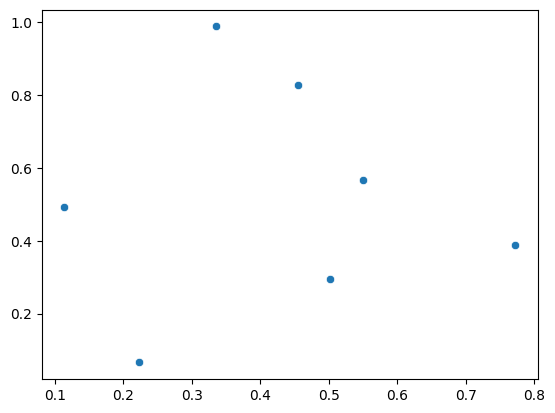

In [3]:
cities = generate_cities(CITIES)  # generate cities
sns.scatterplot(x=cities[:, 0], y=cities[:, 1])  # plot cities

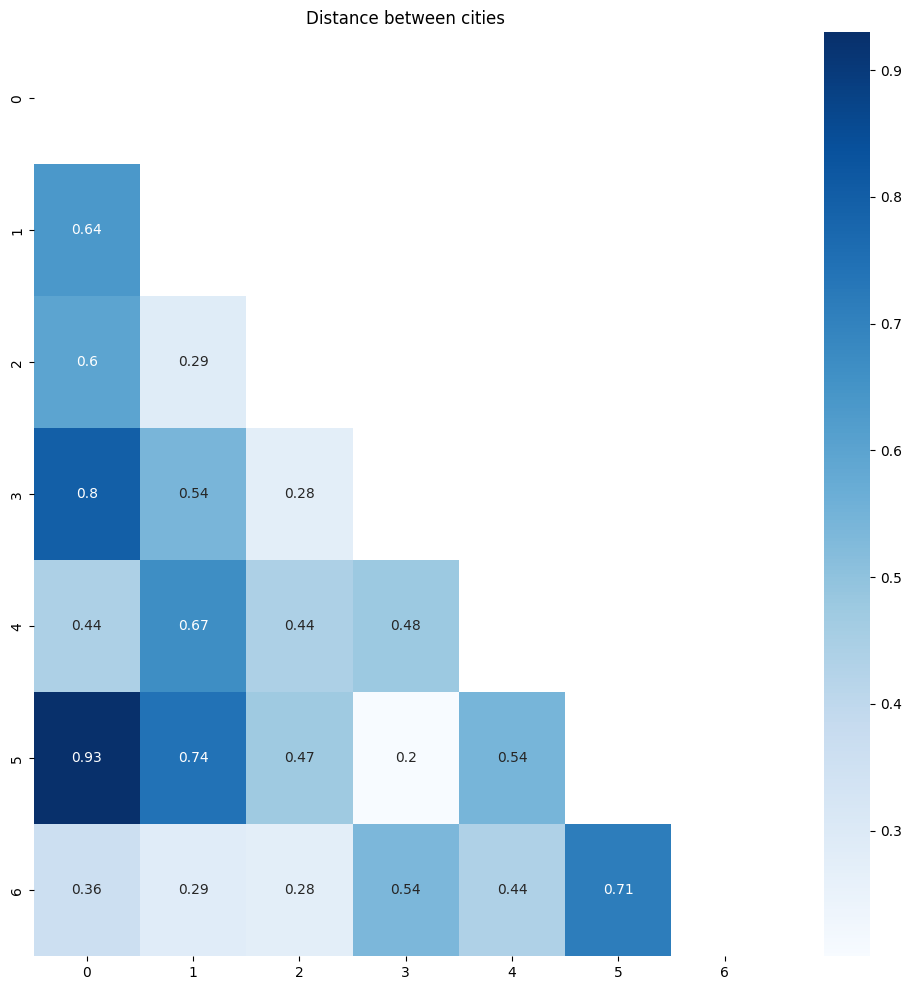

In [4]:
distances = np.zeros((CITIES, CITIES))
for i in range(CITIES):
    for j in range(CITIES):  
        distances[i, j] = get_distance_between_cities(cities[i], cities[j])

# plot the distance between cities (using heatmap)
plt.figure(figsize=(12, 12))
mask = np.zeros_like(distances)  # create a mask
mask[np.triu_indices_from(mask)] = True  # apply the mask
sns.heatmap(distances, annot=True, mask=mask, cmap='Blues')  # plot heatmap
plt.title('Distance between cities')
plt.show()

### [Exhaustive Search](https://en.wikipedia.org/wiki/Exhaustive_search)

We implement a program that generates all possible solutions for the TSP using two algorithms, namely the **Heap algorithm** and the **Steinhaus–Johnson–Trotter algorithm**. By examining the complete solution space, we aim to evaluate the computational feasibility of exhaustively solving TSP for a given number of cities.

- Time Complexity: $O(n!)$
- Space Complexity: $O(n)$

In [5]:
def exhaustive_search(cities: np.ndarray) -> np.ndarray:
    """Exhaustive search algorithm."""
    best_solution = np.arange(CITIES)
    best_fitness = np.sum([get_distance_between_cities(cities[best_solution[i]], cities[best_solution[i + 1]]) for i in range(CITIES - 1)])
    for solution in itertools.permutations(np.arange(CITIES)):
        fitness = np.sum([get_distance_between_cities(cities[solution[i]], cities[solution[i + 1]]) for i in range(CITIES - 1)])
        if fitness < best_fitness:
            best_fitness = fitness
            best_solution = solution
    return best_solution

Solution:  (4, 0, 6, 1, 2, 3, 5)
Total path distance: 1.8500981766318079
[0.11398969 0.49248769] -> [0.2234672  0.06574613]: 0.440561
[0.2234672  0.06574613] -> [0.50227888 0.29458878]: 0.360701
[0.50227888 0.29458878] -> [0.77187953 0.38726468]: 0.285085
[0.77187953 0.38726468] -> [0.54920268 0.56783111]: 0.286687
[0.54920268 0.56783111] -> [0.45534382 0.8276879 ]: 0.276288
[0.45534382 0.8276879 ] -> [0.33559089 0.98884271]: 0.200778


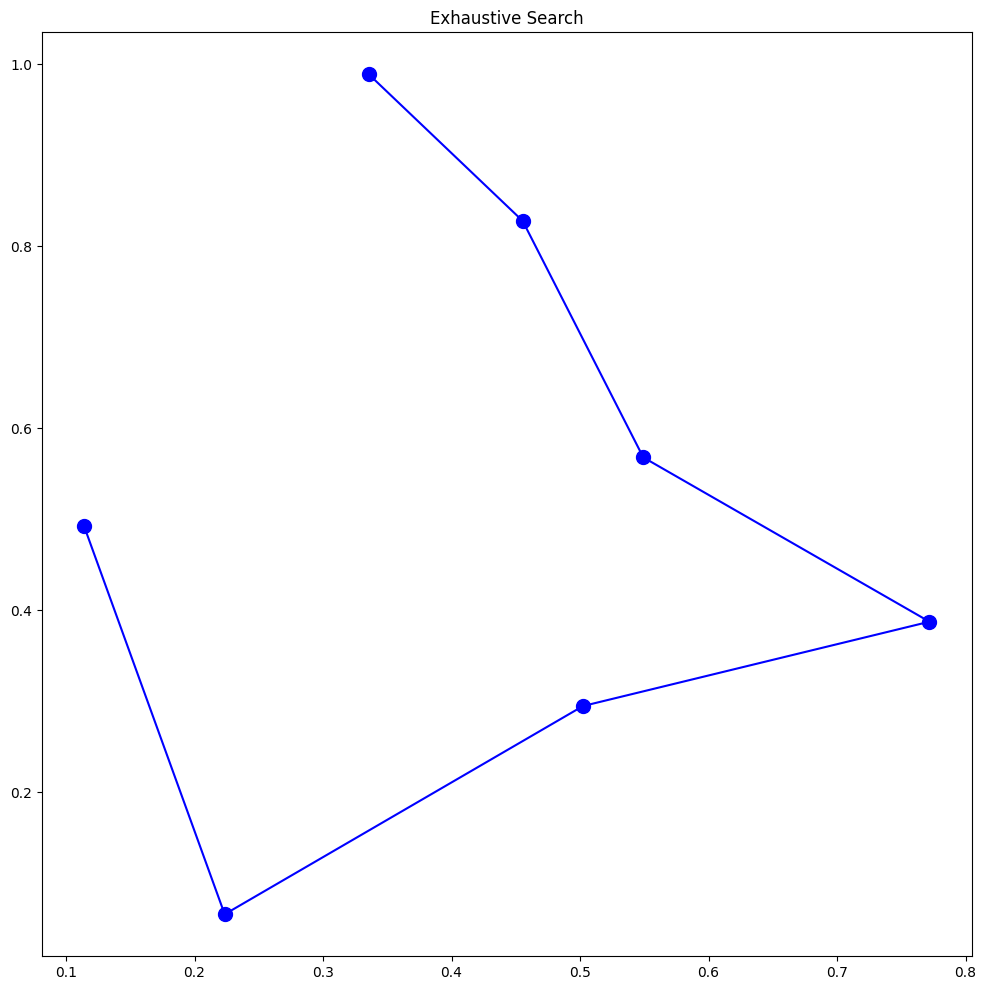

In [6]:
exhaustive_solution = exhaustive_search(cities)

print_distances(cities, exhaustive_solution)
plot_solution("Exhaustive Search", cities, exhaustive_solution)

#### [Heap's Algorithm](https://en.wikipedia.org/wiki/Heap%27s_algorithm)

The Heap's Algorithm constructs all possible permutations of $n$ objects. It is a **[recursive](https://en.wikipedia.org/wiki/Recursion_(computer_science))** algorithm that generates each permutation from the previous one by choosing two elements to interchange.

The algorithm generates each permutation from the previous one by choosing two elements to interchange. The number of permutations of $n$ objects is $n!$.

The algorithm is named after [B. R. Heap](https://en.wikipedia.org/wiki/B._R._Heap), who published it in 1963, but it was first proposed by [Johnson](https://en.wikipedia.org/wiki/Johnson%27s_algorithm) in 1962.

See also the [original paper](https://watermark.silverchair.com/6-3-293.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAsIwggK-BgkqhkiG9w0BBwagggKvMIICqwIBADCCAqQGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQM2W6w8Xqw0-17kz6lAgEQgIICdfPrsgBP0Cgc2wbMXjRGZhPqXfo5Z4GsCedCurL8Y4XuYwb7PVR1rdZ7TZhm-vkY5k9MU2Q90HgAIrxFG6Yt8cSVjC9rbnFPTDs5DHqHHSdxk9FrWBAdQQNovxrOcaXDJR3vFGUNhfiYDFlt1lAyOYLgGVsS83R74vj9Bm9QLX_tT_INwtbwQGtzE59EH9621_iMnDmkmMqZsKiOyclGHqMaROeVJs_-WUrW3oGE5BvjeM52Zs1k4Xe6pPVIsHhRg3Af00RYSRr3Q74ti0jvhewdseR73sJtsypApAb4YNsOxN4-Vk60L82GXMjAdDo2_CtRMnYXIWr_RwmWspFhsUXnHmwahS_uunBvfTm-76EhPOn0h8Sqjnf8baWfmDDNFf4xSr1o7F1Fxj6f6iyxZp3b0dAlMhxqhVS5PIwHtZwQXMejDUBK5X-Wh2ZxV7UH-zDK-H6rSFppNnssxJxz2TIZ7xQpdPbD6l64BnFRBWkogS2bbZ6m_z-blyjEeeKblNGr8HPT6kw7sEj6_4I7OKtKW54REcR5SFhWibWK1_QQkl-ammMyjSm7P4HMqjJVuifYL2rnKPVYtyT73r2buCbeVB6t6wG1iloyOq-0cPumL8su53hkqq7_5VlkMmoRM4pAIN2NIV27eYymLMgmx9Ku1wEgP0q9JHE-11T_TqxZGuHt5f9-R6JtFD-Ms9qkAoQOoSJFp88-5zeJWTa2wU4jokIrh_QwJVcPT39xR7Q5Qb1pXQLFzZ9d80RVioVfiePH98l81o6yW-BqHW2Q0rSfCLuoYSoru4Im06m_1C-jc9r9UCXS5SsYb_it5A5BCD4Z2Ylv) pdf. 

In [7]:
def heap_permutations(cities: np.ndarray, size: int) -> np.ndarray:
    permutations = []  # List to store permutations

    # Auxiliar function to generate all permutations of a list
    def generate_permutations(cities: np.ndarray, n: int) -> None:
        if n != 1:  # if size is not 1 then generate all permutations of size n-1
            for i in range(n):  # One by one move all characters from first to last
                generate_permutations(cities, n - 1)  # call generate_permutations() recursively to generate the permutations
                if n % 2 == 0: cities[i], cities[n - 1] = cities[n - 1], cities[i]   # if n is even swap ith and last element
                else: cities[0], cities[n - 1] = cities[n - 1], cities[0]  # If n is odd swap first and last element
        else: permutations.append(cities.copy())  # If size is 1 then append the obtained permutation

    generate_permutations(cities, size)  # Generate all permutations of cities
    return np.array(permutations)  # Return permutations as a numpy array

solution = np.arange(CITIES)
permutations = heap_permutations(solution, len(solution))
# print(permutations.shape)
# print(permutations)

print(f"Permutation: {permutations[np.argmin([np.sum([get_distance_between_cities(cities[permutations[i][j]], cities[permutations[i][j + 1]]) for j in range(CITIES - 1)]) for i in range(permutations.shape[0])])]}")
print(f"Minimum distance: {np.min([np.sum([get_distance_between_cities(cities[permutations[i][j]], cities[permutations[i][j + 1]]) for j in range(CITIES - 1)]) for i in range(permutations.shape[0])])}")

Permutation: [4 0 6 1 2 3 5]
Minimum distance: 1.8500981766318079


#### [SJT Algorithm](https://en.wikipedia.org/wiki/Steinhaus%E2%80%93Johnson%E2%80%93Trotter_algorithm)

The Steinhaus-Johnson-Trotter (SJT) algorithm is a **[recursive](https://en.wikipedia.org/wiki/Recursion_(computer_science))** algorithm that generates each permutation from the previous one by choosing two elements to interchange.

The algorithm generates each permutation from the previous one by choosing two elements to interchange. The number of permutations of $n$ objects is $n!$.

The algorithm is named after [Hugo Steinhaus](https://en.wikipedia.org/wiki/Hugo_Steinhaus), [Selmer M. Johnson](https://en.wikipedia.org/wiki/Selmer_M._Johnson), and [Hale F. Trotter](https://en.wikipedia.org/wiki/Hale_F._Trotter), who published it in 1963, but it was first proposed by [Johnson](https://en.wikipedia.org/wiki/Johnson%27s_algorithm) in 1962.

In [11]:
def sjt_permutations(cities: np.ndarray, size: int) -> list[np.ndarray]:
    # List to store the permutations generated
    permutations = []

    # Initialize the direction array
    directions = np.zeros(size, dtype=int)
    permutation = cities.copy()
    permutations.append(permutation.copy())

    def find_mobile_elements():
        mobile_elements = []
        for i in range(size):
            if (0 <= i + directions[i] < size) and permutation[i] > permutation[i + directions[i]]:
                mobile_elements.append(i)
        return mobile_elements

    def swap_elements(index1, index2):
        permutation[index1], permutation[index2] = permutation[index2], permutation[index1]
        directions[index1], directions[index2] = directions[index2], directions[index1]

    def reverse_directions(mobile_element):
        for i in range(size):
            if permutation[i] > permutation[mobile_element]:
                directions[i] *= -1

    def sjt_algorithm():
        while True:
            mobile_elements = find_mobile_elements()
            if not mobile_elements:
                break
            mobile_element = max(mobile_elements, key=lambda x: permutation[x])
            mobile_element_index = mobile_elements.index(mobile_element)

            if directions[mobile_element] == -1:
                swap_elements(mobile_element, mobile_element - 1)
            else:
                swap_elements(mobile_element, mobile_element + 1)

            reverse_directions(mobile_element)

            permutations.append(permutation.copy())

            for i in range(size):
                if permutation[i] > mobile_element:
                    directions[i] = -1

    sjt_algorithm()

    return permutations


solution = np.arange(CITIES)
permutations = sjt_permutations(solution, len(solution))
print(f"Number of permutations: {len(permutations)}")
print(permutations)

print(f"Permutation: {permutations[np.argmin([np.sum([get_distance_between_cities(cities[permutations[i][j]], cities[permutations[i][j + 1]]) for j in range(CITIES - 1)]) for i in range(len(permutations))])]}")
print(f"Minimum distance: {np.min([np.sum([get_distance_between_cities(cities[permutations[i][j]], cities[permutations[i][j + 1]]) for j in range(CITIES - 1)]) for i in range(len(permutations))])}")

Number of permutations: 1
[array([0, 1, 2, 3, 4, 5, 6])]
Permutation: [0 1 2 3 4 5 6]
Minimum distance: 2.9346636093616123


### [Random Search](https://en.wikipedia.org/wiki/Random_search)

### [Hill Climbing Search](https://en.wikipedia.org/wiki/Hill_climbing)